In [16]:
#opening the csv
import pandas as pd
iris= pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
#checking the columns
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#statitics
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#checking for empty cells
iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
#top 5
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#last 5
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


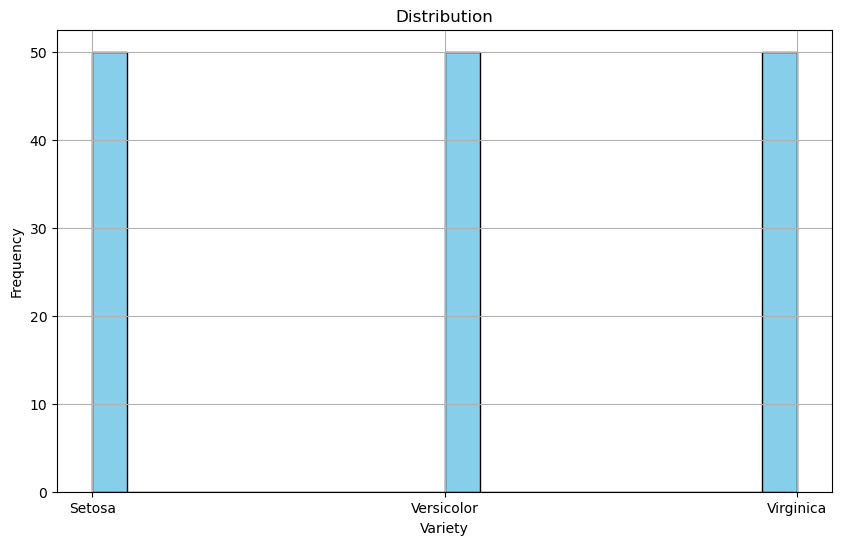

In [7]:
#graph on distribution
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(iris['variety'], bins=20, color= 'skyblue', edgecolor='black')
plt.title('Distribution')
plt.xlabel('Variety')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

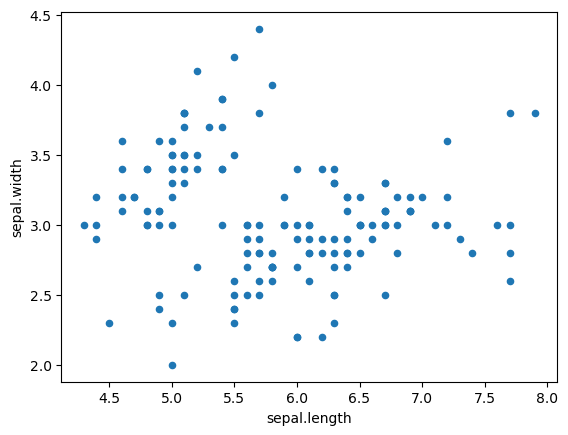

In [8]:
#scatter plot on sepal
iris.plot(kind= 'scatter', x='sepal.length', y='sepal.width')



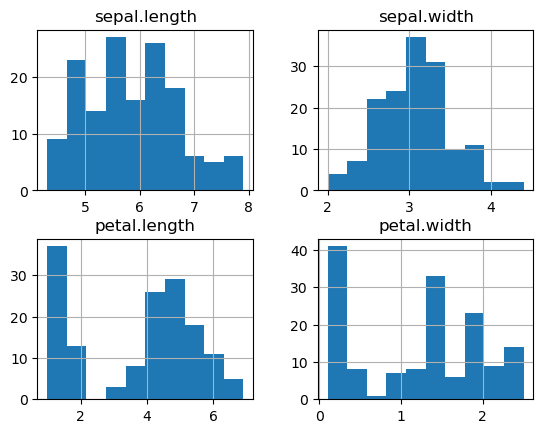

In [9]:
iris.hist()
plt.show()

C:\Users\Emmanuel Oke\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


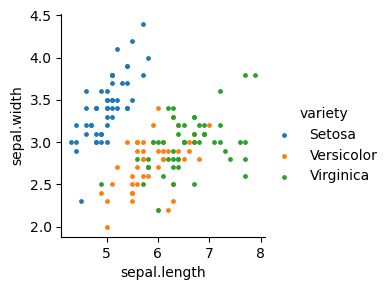

In [10]:
import seaborn as sns 
g= sns.FacetGrid(iris, hue='variety')
g.map(plt.scatter, 'sepal.length', 'sepal.width', s=6)
g.add_legend()

C:\Users\Emmanuel Oke\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


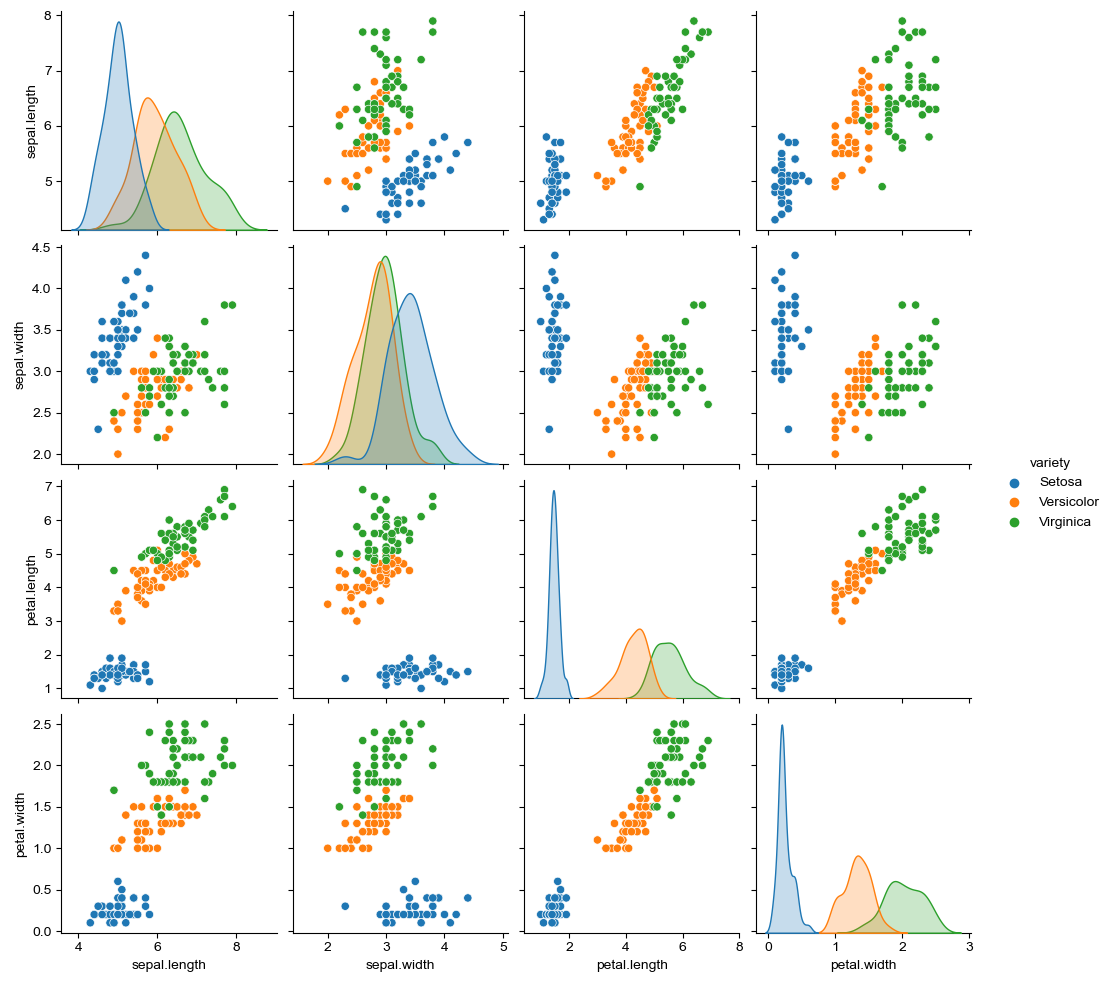

In [11]:
sns.pairplot(iris, hue='variety')
sns.set()

C:\Users\Emmanuel Oke\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


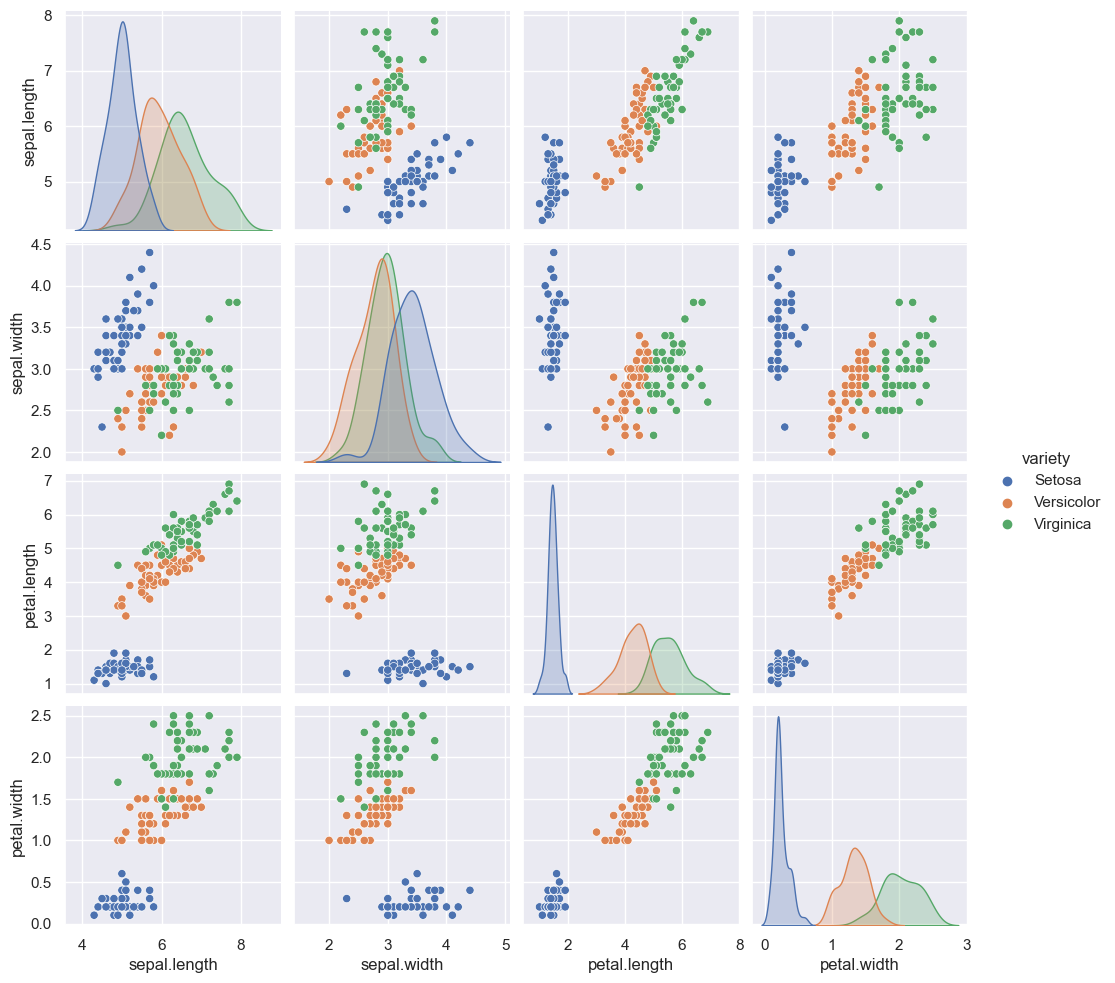

In [12]:
sns.pairplot(iris, hue='variety', diag_kind='kde')
plt.show()

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [3]:
X= iris.iloc[:, :-1].values
Y= iris.iloc[:, -1].values
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)


In [17]:
from sklearn.linear_model import LogisticRegression
linear= LogisticRegression()
linear.fit(X_train, Y_train)
Y_pred= linear.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(Y_pred, Y_test))

C:\Users\Emmanuel Oke\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is 1.0


In [18]:
#testing the model
from sklearn.linear_model import LogisticRegression
import numpy as np
sepal_length=float(input("Enter sepal length: "))
sepal_width=float(input('Enter sepal width: '))
petal_length=float(input("Enter petal length: "))
petal_width=float(input('Enter petal width: '))
x_new= np.array([[sepal_length, sepal_width, petal_length, petal_length]])
result= linear.predict(x_new)
print('prediction of variety is',result)

Enter sepal length: 7
Enter sepal width: 5
Enter petal length: 3
Enter petal width: 2
prediction of variety is ['Versicolor']
